#Solución taller Eigenfaces.

Construya un algoritmo que aprenda una representación basado en eigenfaces.



###**1.** Seleccione un dataset adecuado para la construcción de la representación.

$\underline{\textit{Solución}}$

El Dataset  con el cual se trabajara fue tomado de  $[2]$, es un dataset que condensa las imagenes de  las caras de $40$ personas tomadas de frente en escala de grises (Cada entrada de la matriz tiene un valor entre $[0,1]$ que representa una escala de grisis, como esta en este intervalo se dice que los valores de las entradas estan normalizados), haciendo diferentes muecas. De cada persona se tomaron $10$ fotos y cada imagen tiene $64\times64$ pixeles es decir trabajaremos con filas de dimención $4096$, es por ellos que la matriz que observaremos sera de $400\times 4096$, sumado a esto hay una columna adicional en la cual cada entrada  sera la etiquieta de cada vector de $1\times 4096$ correspondiente a la persona a la cual representa este vector en la imagen.


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


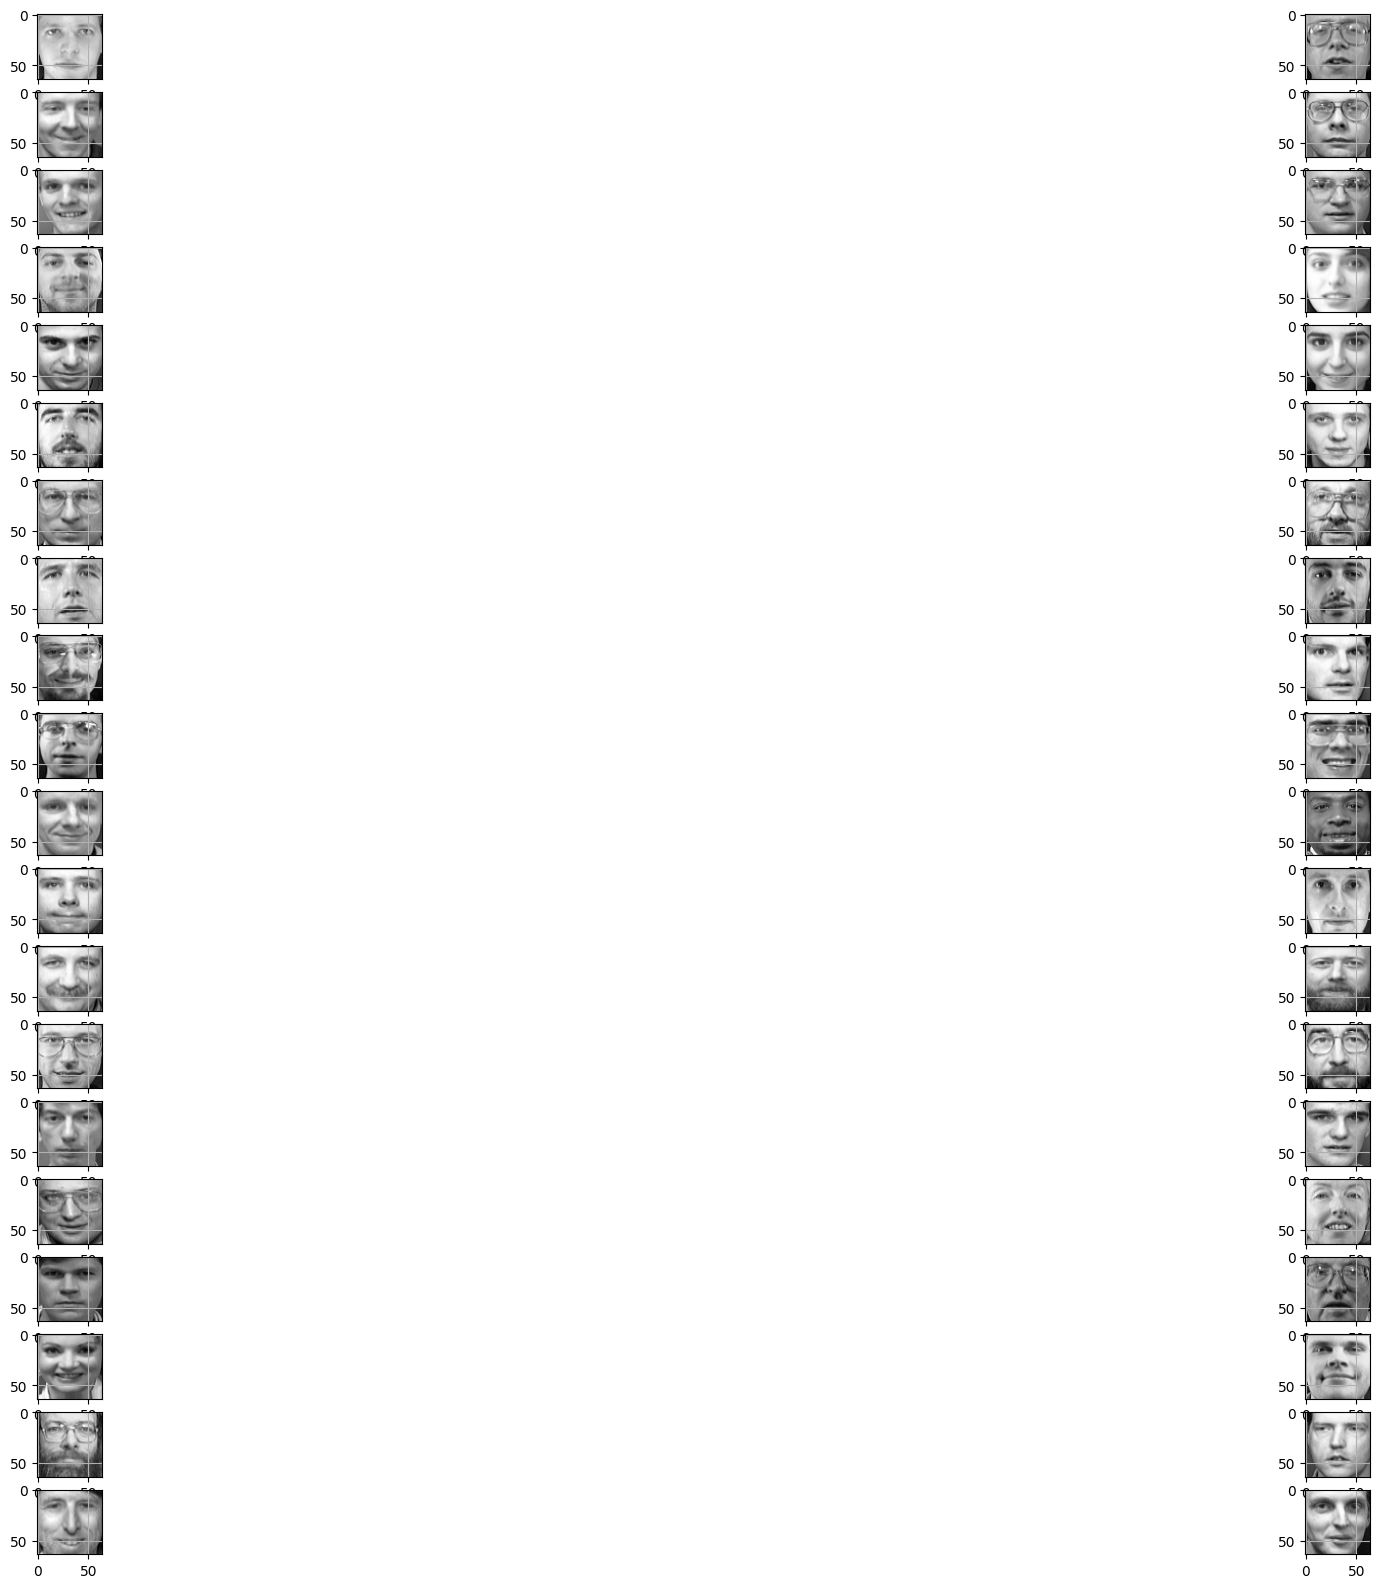

In [1]:

# Load useful libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
import os
import matplotlib.image as mpimg
from PIL import Image

# To check RGB Images for dim
def is_colored(image):
    # Check for three channels
    if len(image.shape) == 3:
        R, G, B = image[:, : , 0], image[:, :, 1], image[:, :, 2]
        if (R == G).all() and (G == B).all():
            return True
    return False
# method to show images as grid
def show_images(images, grid=True, total_cols=2, figsize=(30, 20)):
    assert len(images) > 0
    assert isinstance(images[0], np.ndarray)
    # extracting length of images i.e 6
    totalImages  = len(images)
    total_cols    = min(totalImages, total_cols)
    total_rows    = int(totalImages / total_cols) + (1 if totalImages % total_cols != 0 else 0)
    # Create a grid of subplots.
    fig, axes = plt.subplots(total_rows, total_cols, figsize=figsize)
    # Create list of axes for easy iteration.
    if isinstance(axes, np.ndarray):
        list_axes = list(axes.flat)
    else:
        list_axes = [axes]
    # it will helps to show total images as grid
    for i in range(totalImages):
        img    = images[i]
        list_axes[i].imshow(img, cmap='gray')
        list_axes[i].grid(grid)

    for i in range(totalImages, len(list_axes)):
        list_axes[i].set_visible(False)

# loading dataset
image_data = fetch_olivetti_faces()
# creating list of 6 images
images =[image_data.images[0]]
for i in range(1,40):
  images.append(image_data.images[10*i])
# images = [image_data.images[0], image_data.images[1], image_data.images[2],image_data.images[3],image_data.images[4],image_data.images[5],image_data.images[9],image_data.images[10]]
# Using show_images method to display images
show_images(images, figsize=(30, 20))


In [2]:
type(image_data)

sklearn.utils._bunch.Bunch

**Visualización cara promedio**

Ahora hallaremos la cara promedio, sumando todas caras pixel por pixel  y dividiendo entre el total de caras es decir entre 400

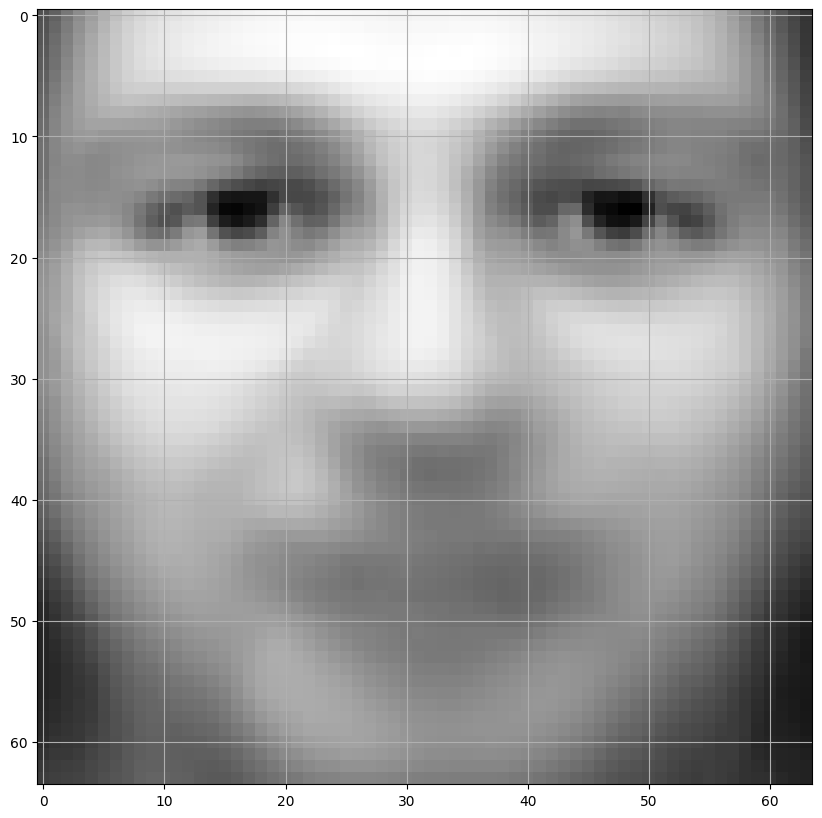

In [3]:
prom = np.zeros((64,64))
for i in range(0,400):
  prom = prom + image_data.images[i]

prom = prom/400
show_images([prom], figsize=(10, 20))

Ahora centramos las caras restando la cara promedio

In [4]:
import numpy as np
import numpy.linalg as linalg
import numpy as np
from scipy.linalg import eigh

sta_images = []
for i in range(0,400):
  sta_images.append(image_data.images[i] - prom)

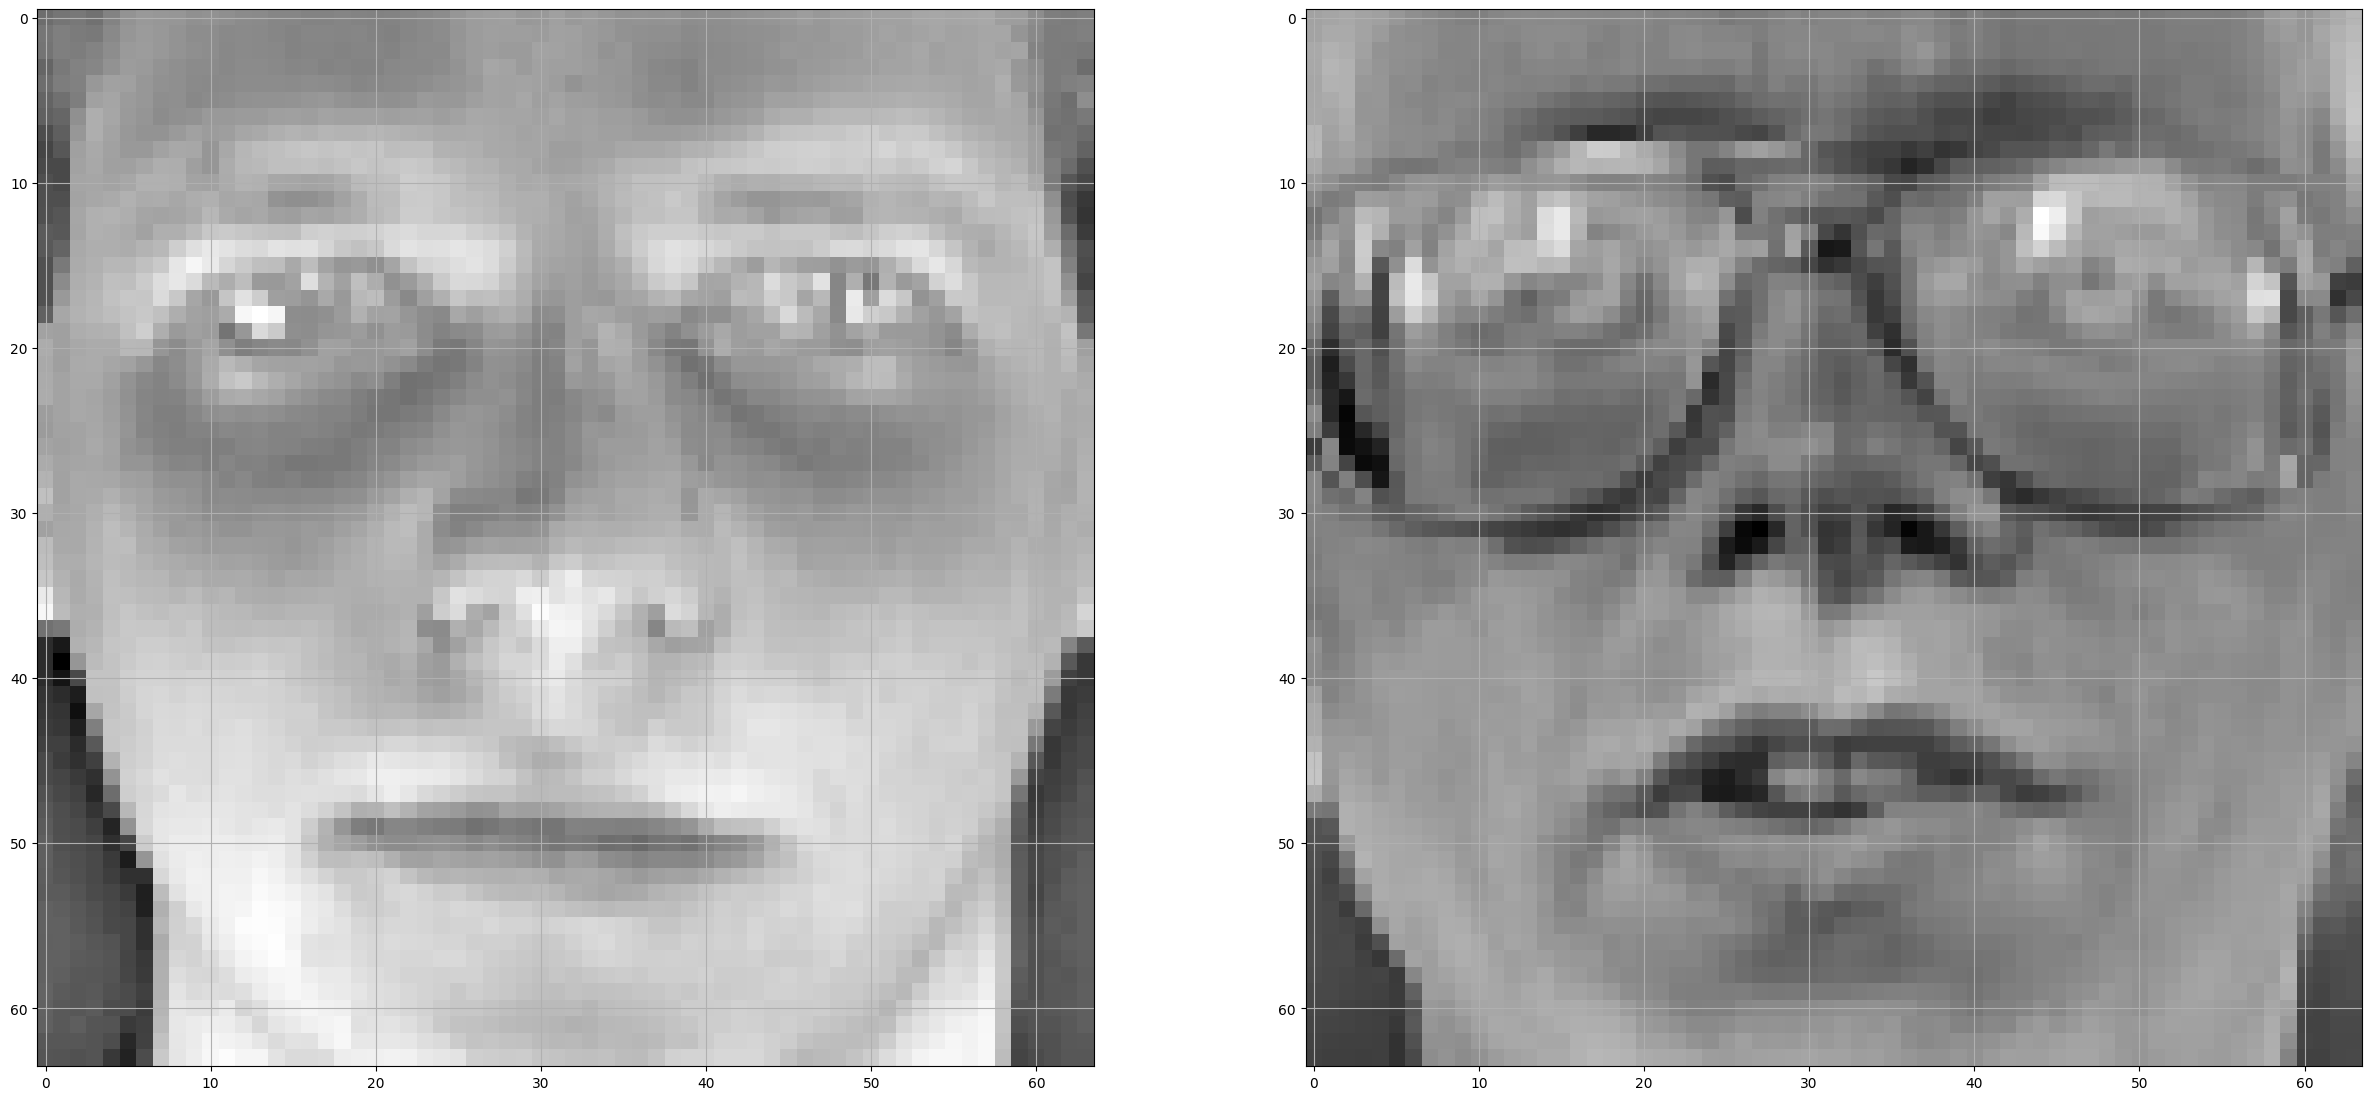

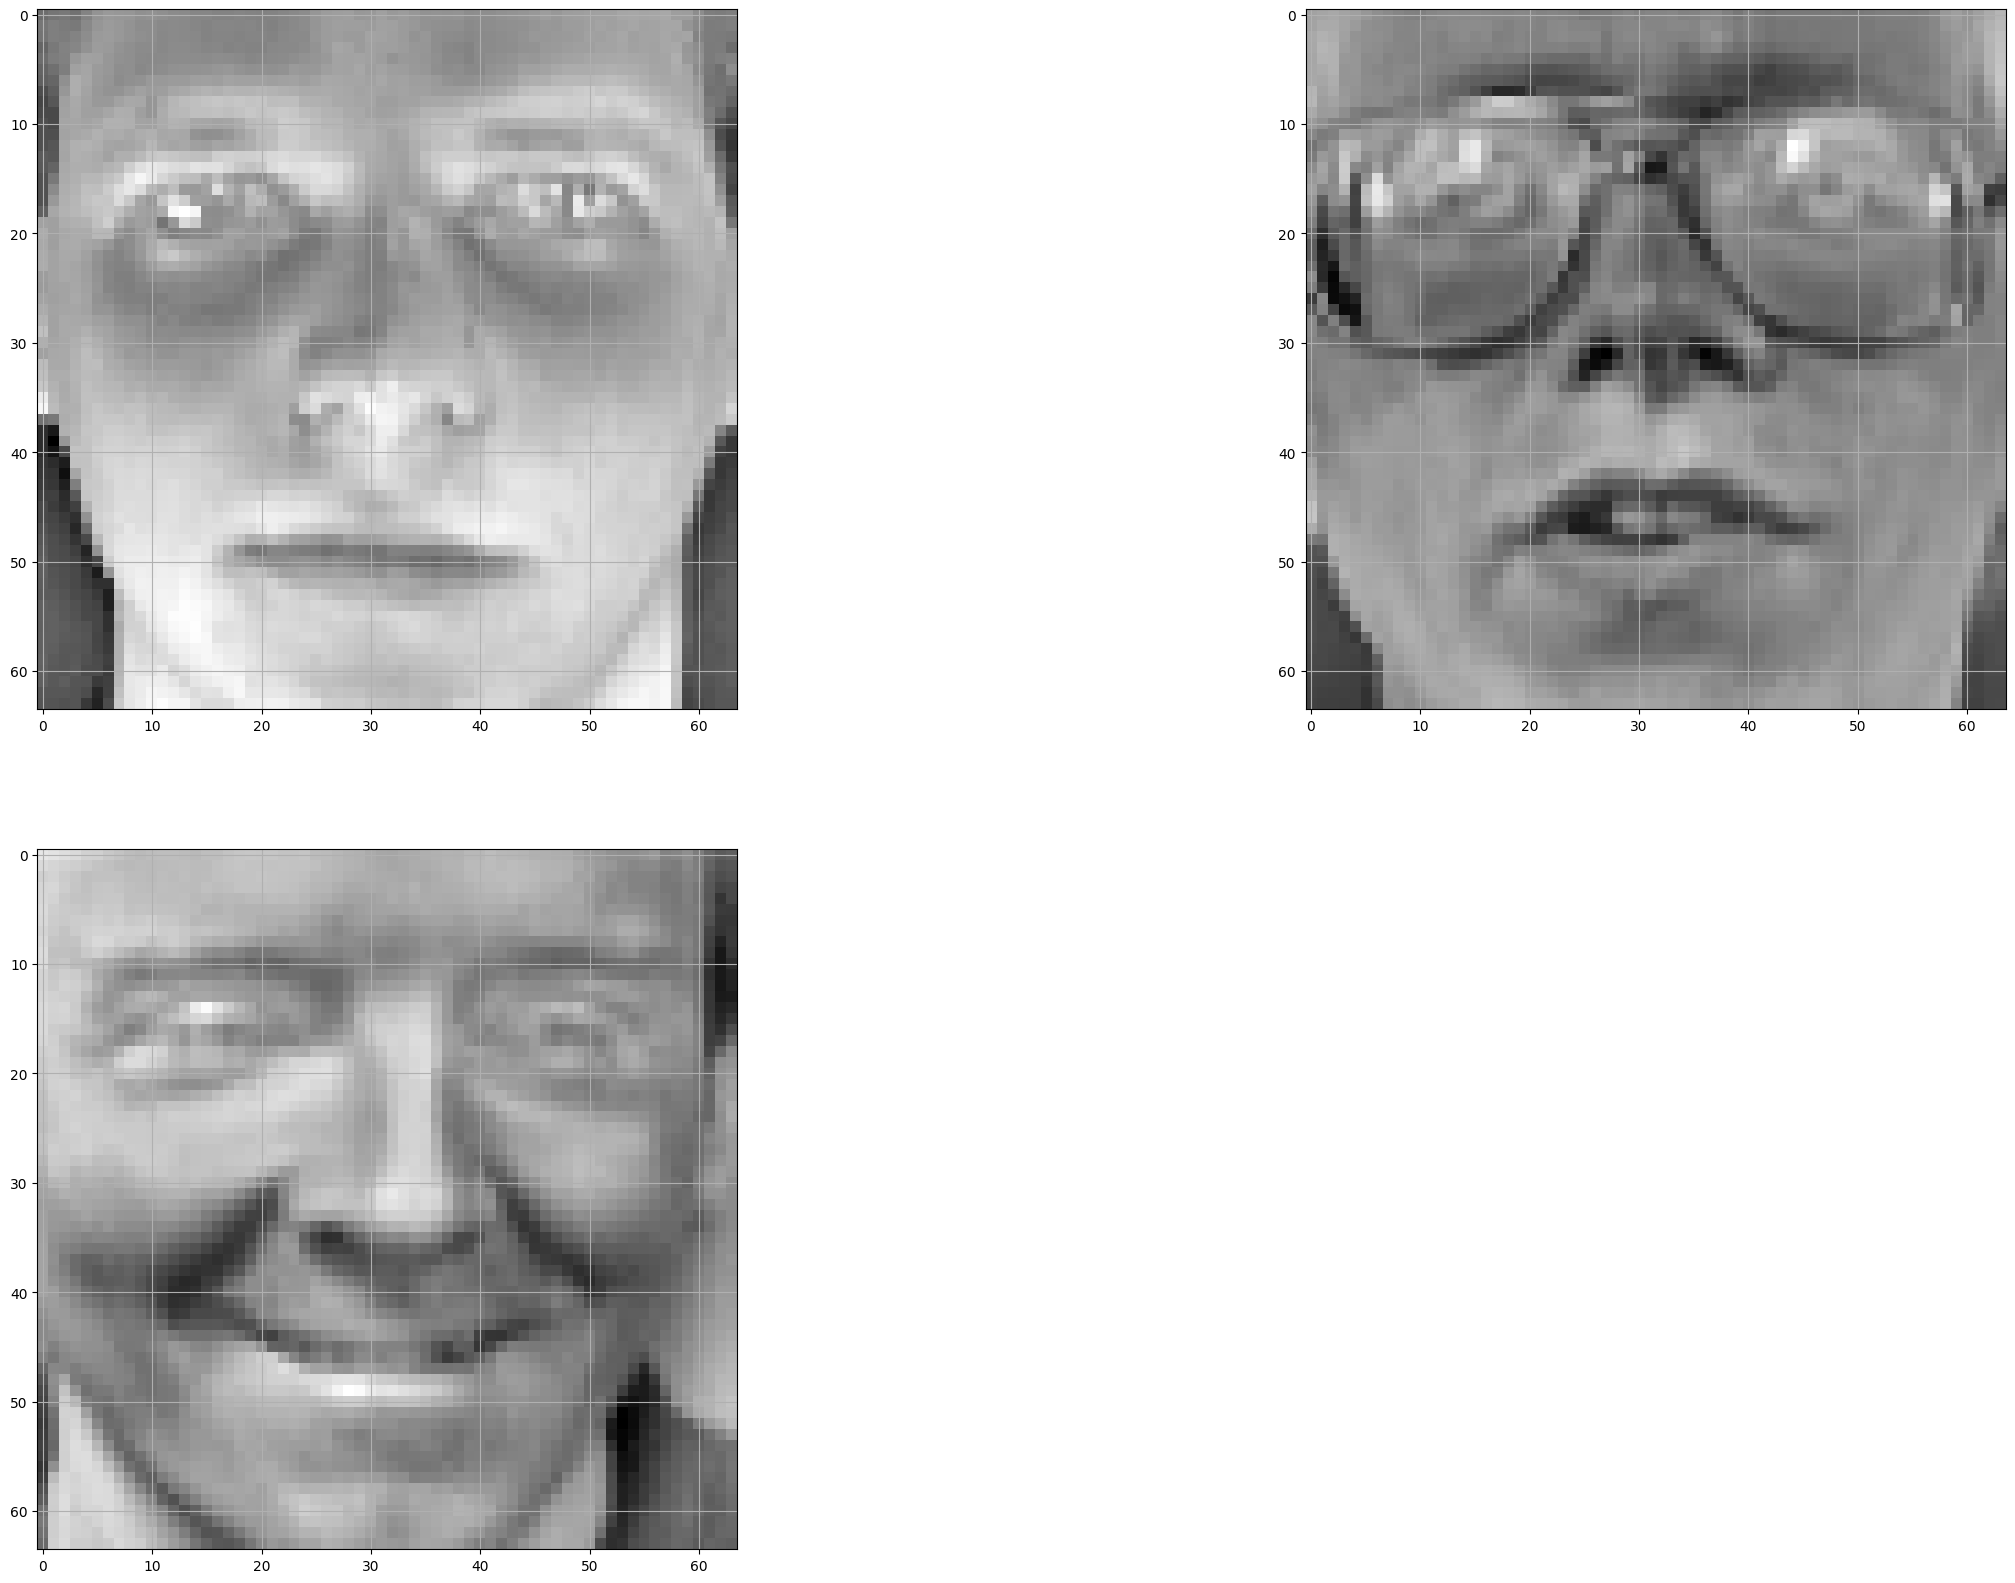

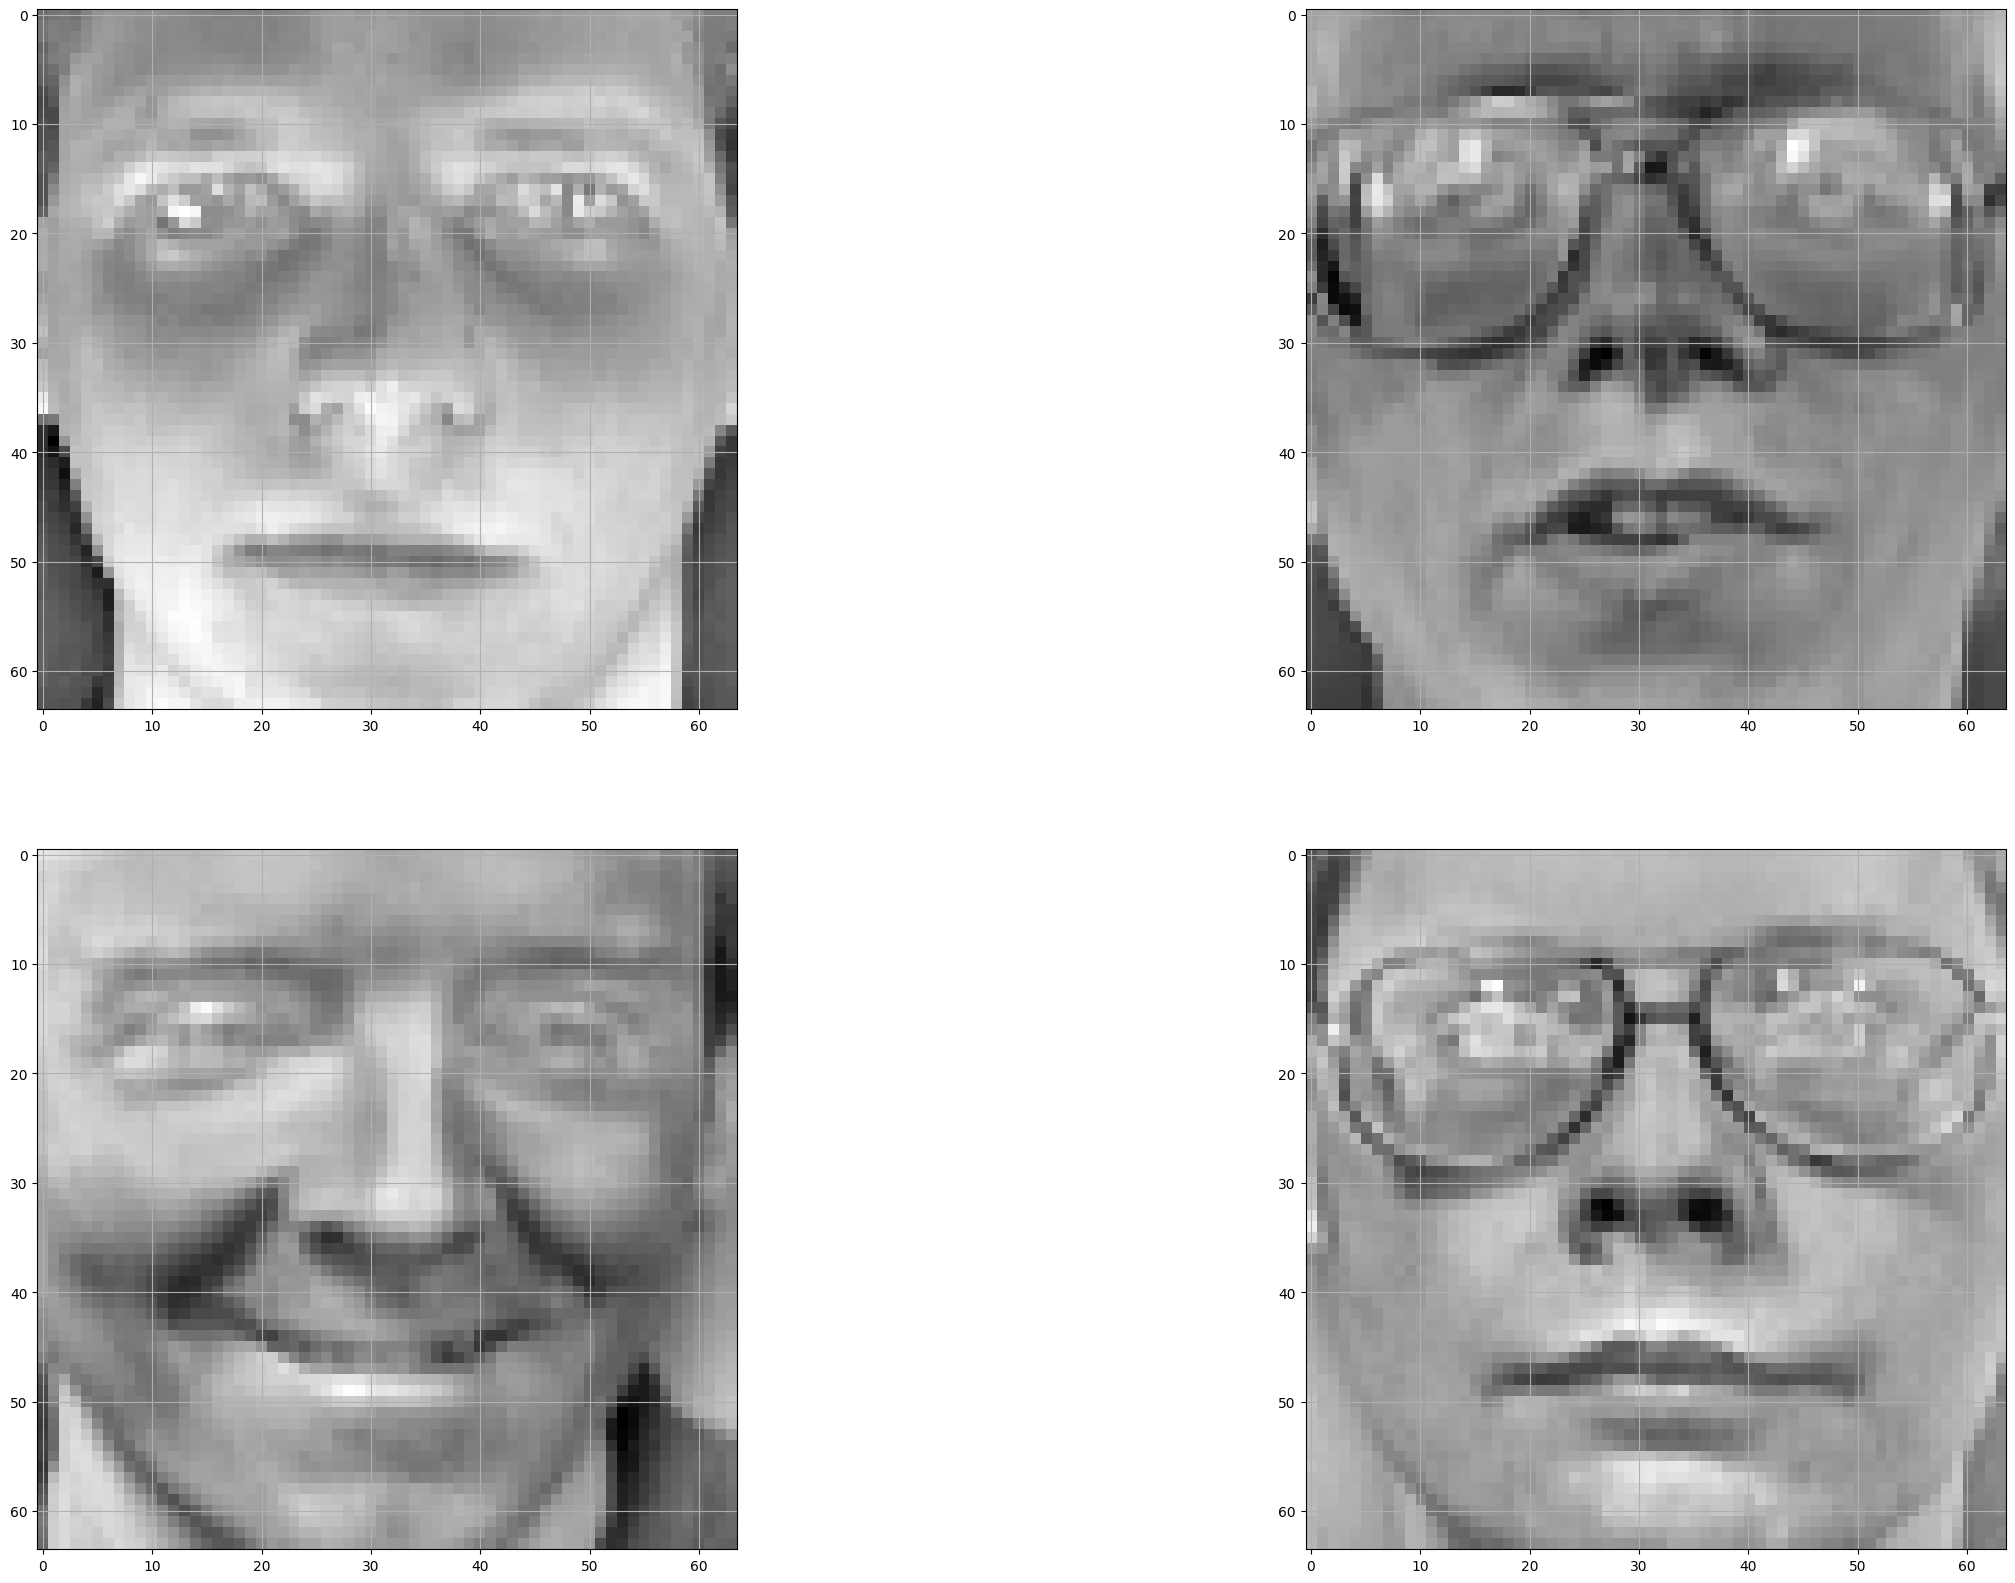

In [6]:
#Visualizacion caras centradas
distinct_images = [sta_images[0]]
for i in range(1,4):
  distinct_images.append(sta_images[10*i])
  show_images(distinct_images, figsize=(30, 20))

### **2.** Implemente el algoritmo de eigenfaces.


$\underline{\textit{Solución}}$

Recordemos que el algoritmo Para hallar las eigenfaces dado en clase es  el siguiente: (tamado de $[3]$)

1. Calcular la media $\mu_{i}$ de cada columna en la matriz, dándonos el valor de intensidad de píxel promedio para cada coordenada $(x, y)$ en el conjunto de datos de la imagen.

2. Restar el $\mu_{i}$ de cada columna $c_i$  esto se llama centrar los datos en la media y es un paso obligatorio cuando se realiza PCA.

3. Ahora que nuestra matriz $M$ se ha centrado en la media, calcule la matriz de covarianza.

4. Realice una descomposición de valores propios en la matriz de covarianza para obtener los valores propios $\lambda_{i}$ y vectores propios $\mathbf{X_{i}}$.

5. Clasificar $\mathbf{X_{i}}$ por $|\lambda_{i}|$, de mayor a menor.

5. Tome los $N$ vectores propios superiores con la magnitud de valor propio correspondiente más grande.

6. Transforme los datos de entrada proyectándolos (es decir, tomando el producto escalar) en el espacio creado por los $N$ vectores propios superiores ; estos vectores propios se llaman nuestras caras propias.

**1,2**  ya los hicimos en el primero punto

In [ ]:
np.shape(sta_images)

(400, 64, 64)

In [ ]:
sta_images_data =[]
for i in range(0,400):
  sta_images_data.append(np.reshape(sta_images[i],4096))  #convertir a una matriz 400x4096


In [ ]:
np.shape(sta_images_data)

(400, 4096)

**3** Ahora calculemos la matriz de covarianza

In [ ]:
covmatrix=np.identity(4096)

for j in range(4095):
 for i in range(4095):

  covmatrix[i,j]= (1/4095)*(sta_images_data[i,:]@sta_images_data[j,:])

#covmatrix = np.cov(np.transpose(sta_images_data))


**4** Ahora calculamos lo valores y vectores propios de la anterior matriz

In [ ]:
w,v=np.linalg.eigh(covmatrix)   #Cálculo de los valores y vectories propios

print(w)
print(v)

[-5.32203056e-15 -4.00523710e-15 -3.71678719e-15 ...  6.30461472e+00
  1.10717621e+01  1.88401758e+01]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.35690806e-03
  -2.85913917e-02 -4.19110344e-03]
 [ 2.33597455e-01  1.45190022e-01  2.90014979e-02 ... -3.25796997e-04
  -3.32883617e-02 -7.10950080e-03]
 [-5.41480126e-01  8.03356857e-02  6.72758310e-02 ... -1.97989097e-04
  -3.78464972e-02 -9.33609356e-03]
 ...
 [-2.42922619e-02  2.14537804e-02  5.49616183e-03 ... -1.54136527e-02
   2.96278271e-02  1.85158524e-04]
 [ 6.95694919e-03  1.36462510e-02 -1.38633250e-02 ... -1.37097845e-02
   2.72129858e-02  3.37965507e-03]
 [ 1.28757357e-02 -9.12638064e-04 -4.49326912e-03 ... -1.18834136e-02
   2.48889921e-02  3.18825641e-03]]


**5** Ahora organizamos los valores propios de mayor a menor

In [ ]:
idx = w.argsort()[::-1]
eigenValues = w[idx]
eigenVectors = v[:,idx]

**6** Ahora toma Tomamos los primero $N=400$ valores propios pues son los que tienen mayor aporte, los otros son insignificantes en tamaño al compararlos( diferencia de $10^{-12}$), puesto que  $$\texttt{eigenvalue[400]}=1.29734641\cdot 10^{-3}>>\texttt{eigenvalue[401]}=5.50794406\cdot 10^{-15}$$

In [ ]:
N=4096   #399
LargesteignValues=eigenValues[0:N]
LargesteignVectors=eigenVectors[0:N,:]
LargesteignValues

array([ 1.88401758e+01,  1.10717621e+01,  6.30461472e+00, ...,
       -3.71678719e-15, -4.00523710e-15, -5.32203056e-15])

**7** Ahora tomamos los repectivos vectores propios y visulizamos

In [ ]:
eigenfaces = []
for i in range(0,400):
  eig_reshape = np.reshape(LargesteignVectors[i], (64,64))
  eigenfaces.append(eig_reshape)

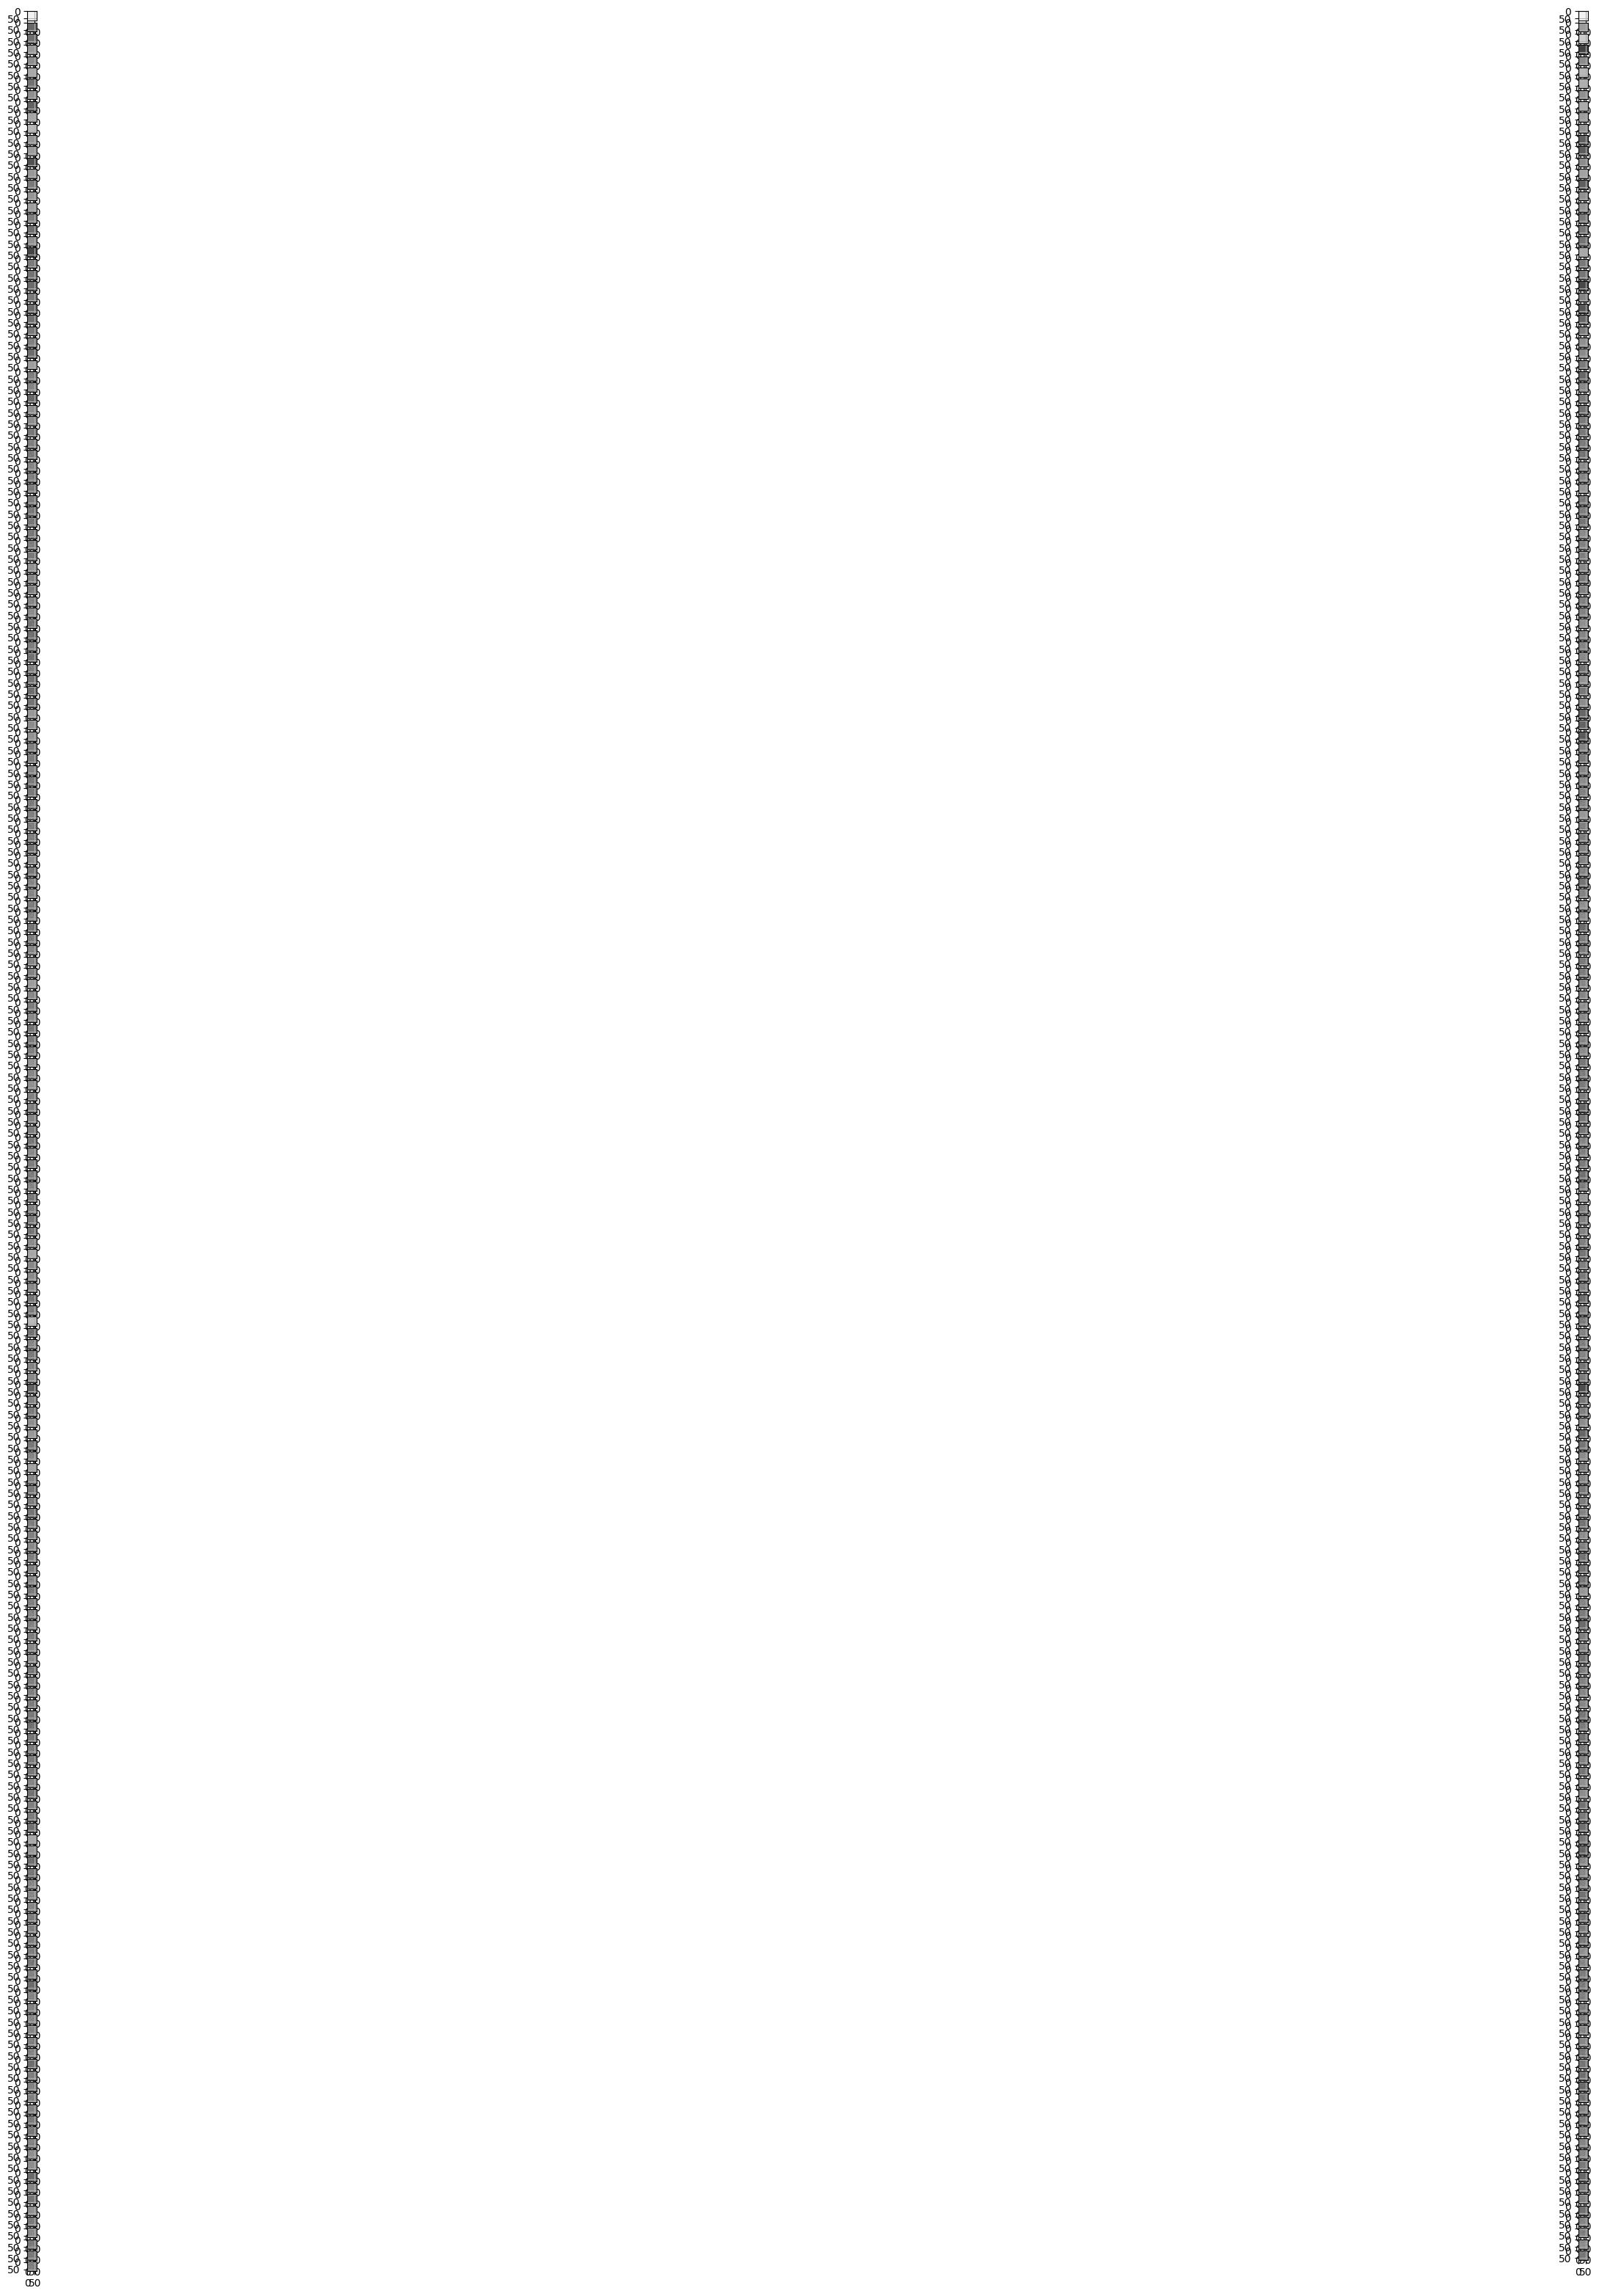

In [ ]:
distinct_eigenfaces = [eigenfaces[0]]
for i in range(0,400):
  distinct_eigenfaces.append(eigenfaces[i])
# Using show_images method to display images
show_images(distinct_eigenfaces, figsize=(50, 40))

### **3.** Encuentre cuales son los eigenfaces que mejor explican una imagen suya.

$\underline{\textit{Solución}}$

Acontinuación utilizamos $\texttt{image}$ de $\texttt{ matplotlib}$, para visualizar una imgagen mia, y de paso ver cuales son los eigenfaces que mejor explican mi cara  (Procedimiento tomado de [6])

Primero colocamos cargamos mi cara




float32
(439, 333, 3)


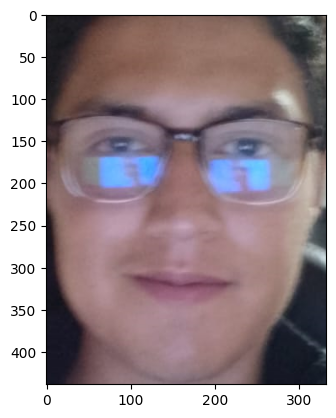

In [ ]:

from matplotlib import image
from matplotlib import pyplot
# cargar una imgen como una matriz de pixeles
image = image.imread('Fotomia.jpeg')
# Resumen de la cantidad de pixeles de la igagen
print(image.dtype)
print(image.shape)
#Mostrar la matriz de pixeles.
pyplot.imshow(image)
pyplot.show()

Ahora convertimos mi imagen a una matriz de pixeles

In [ ]:
#Convertir la matriz de pixles anterior a una numpyarray

from PIL import Image
from numpy import asarray
# cargar la imagen
image = Image.open('Fotomia.jpeg')
# convertir la imagen a una numpyarray
data = asarray(image)
print(type(data))
# resumen dimenciones matriz
print(data.shape)

# Pasar imagen a Image de PIL
image2 = Image.fromarray(data)
print(type(image2))

# Detalles de la imagen
print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(439, 333, 3)
<class 'PIL.Image.Image'>
RGB
(333, 439)


Ahora pasamos nuestra imgen al igual que las fotos del experimento a una escala de grises (En colab se ve como azul pero en realidad lo lee como grises)

In [ ]:

#Pasar imagen a escala de grises

import numpy as np
from PIL import Image
from matplotlib import image
from matplotlib import pyplot


img = Image.open('Fotomia.jpeg')
#Pasar imgen a grises con "L"
imgGray = img.convert('L')
#Guerdar imgen de gris en Fotomia.png
imgGray.save('Fotomia.png')
image = image.imread('Fotomia.png')


Ahora que tenemos la imagen en grises procemos a reesclarla para que quede una imgen de 64x64 pixeles, como las fotos del experimento

In [ ]:
#Cambiar tamaño a 64x64
from matplotlib import image
from matplotlib import pyplot
load_img_rz = np.array(Image.open('Fotomia.png').resize((64,64)))  #Imagen reescalada
Image.fromarray(load_img_rz).save('Fotomiareescalada.png')
print("After resizing:",load_img_rz.shape)

image = image.imread('Fotomiareescalada.png')
print(image.shape)




After resizing: (64, 64)
(64, 64)


Ahora pasamos esta ultima imagen a una matriz de pixeles

In [ ]:
#Convertir la matriz de pixles anterior a una numpyarray

from PIL import Image
from numpy import asarray
# cargar la imagen
image = Image.open('Fotomiareescalada.png')
# convertir la imagen a una numpyarray
data = asarray(image)
print(type(data))
# resumen dimenciones matriz
print(data.shape)

# Pasar imagen a Image de PIL
image2 = Image.fromarray(data)
print(type(image2))

# Detalles de la imagen
print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(64, 64)
<class 'PIL.Image.Image'>
L
(64, 64)


In [ ]:
newdata=data[0,:]
for i in range(63):
  newdata = np.concatenate((newdata , data[i+1,:]))

myface= (1/256)*newdata

In [ ]:
micara=np.concatenate((newdata,np.transpose(np.ones(1))))
micara= (1/256)*np.array([micara,micara])
df=pd.DataFrame(micara)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,0.105469,0.109375,0.109375,0.113281,0.113281,0.109375,0.109375,0.113281,0.105469,0.109375,...,0.09375,0.089844,0.085938,0.09375,0.09375,0.097656,0.105469,0.128906,0.136719,0.003906
1,0.105469,0.109375,0.109375,0.113281,0.113281,0.109375,0.109375,0.113281,0.105469,0.109375,...,0.09375,0.089844,0.085938,0.09375,0.09375,0.097656,0.105469,0.128906,0.136719,0.003906


In [ ]:
def plot_faces(pixels):
    fig, axes = plt.subplots(1, 2, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()


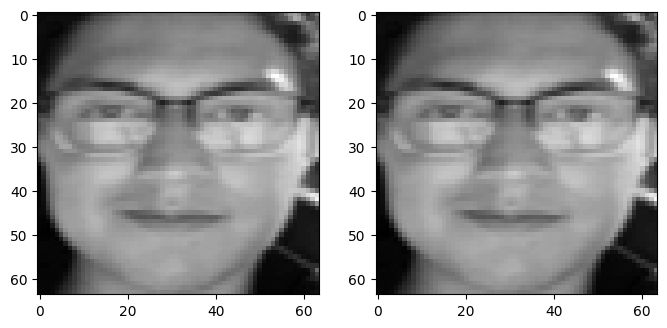

In [ ]:
import matplotlib.pyplot as plt
X = df.drop(4096, axis=1)
y = df[4096]


plot_faces(X)

Ahora proyectemos nuestra cara  sobre las caras propias obtenidas anteriormente, haciendo el respectivo producto punto (Basta hacer esto pues las caras propias son una base ortnormal)

In [ ]:
proyecciones=np.ones(400)

for i in range(400):

 proyecciones[i]=abs(myface@LargesteignVectors[i,:])  #Producto punto entre mi cara y las caras propias

In [ ]:
idx = proyecciones.argsort()[::-1]
proyeccionesvalue = proyecciones[idx]    #Organización de las caras propias que mas se parecen a la  mia, de mayor a menor producto punto
proyeccionescaras= LargesteignVectors[idx,:]

proyeccionesvalue

array([1.89164893, 1.34326107, 1.22402995, 1.18547749, 1.1094543 ,
       1.07955285, 1.07071758, 1.05650025, 1.02870674, 1.01329408,
       1.0040958 , 0.9743849 , 0.97233869, 0.95870456, 0.95480643,
       0.94360957, 0.93879428, 0.93729552, 0.91016906, 0.91009965,
       0.89248012, 0.89191174, 0.87578842, 0.87369594, 0.86427555,
       0.85862726, 0.84913298, 0.84275455, 0.83486402, 0.83082697,
       0.82823841, 0.82599812, 0.810539  , 0.7985446 , 0.79568162,
       0.79427627, 0.7898779 , 0.77375472, 0.77130373, 0.7676675 ,
       0.76463944, 0.75312503, 0.75227203, 0.74947448, 0.73505895,
       0.73338883, 0.72738816, 0.72616619, 0.72531637, 0.71417321,
       0.71203262, 0.71193458, 0.70889935, 0.70297305, 0.70098218,
       0.6881918 , 0.68176827, 0.67452322, 0.67070447, 0.6669923 ,
       0.65893065, 0.65335869, 0.64804606, 0.64757393, 0.64101885,
       0.63870741, 0.6351252 , 0.62319923, 0.62287501, 0.61877242,
       0.60516576, 0.5987844 , 0.59871624, 0.59232134, 0.59096

In [ ]:
onee=pd.DataFrame(np.ones(400))

onee = pd.DataFrame({'target': onee}, columns = ['targett'])
caras=pd.DataFrame(proyeccionescaras)
caras = pd.concat([caras, onee], axis=1,)


In [ ]:

def plot_faces(pixels):
    fig, axes = plt.subplots(10, 10, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()


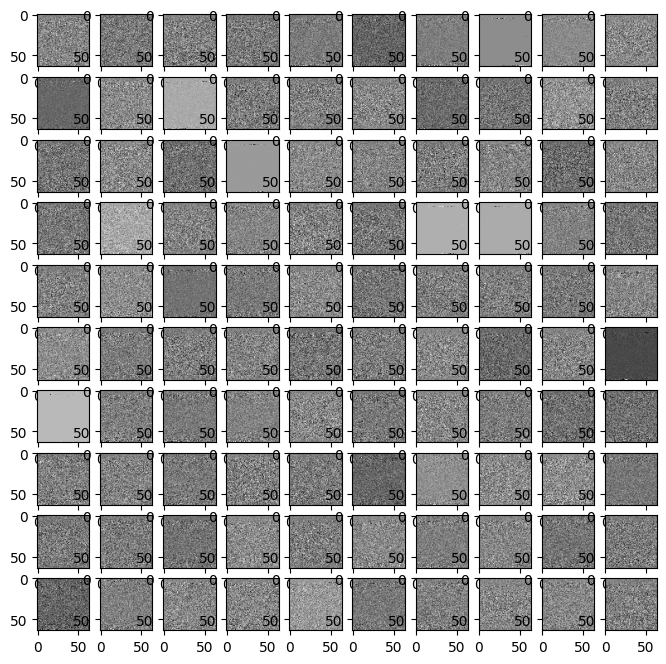

In [ ]:
import matplotlib.pyplot as plt
X = caras.drop('targett', axis=1)
y = caras['targett']

plot_faces(X)

Ahora queremos ver como se recontruye nuestra cara con estas caras propias, para ello hallamos la respectiva combinación lineal con las anteriores proyecciones

In [ ]:
prom_eigenvalues = np.mean(w)
std_eigenvalues = np.std(w)


rep_eigenvalues = []
for i in range(0,4096):        #Quitar valores propios repetidos
  if (abs(w[i])>= 0.2):
    rep_eigenvalues.append(i)


k = 4096
Face_coef = np.zeros(k)        #Calculando las propoyecciones haciendo el respectivo producto punto de mi cara con los vectores propios de la matriz de covarianza
for i in range(k):
  Face_coef[i] = np.dot(myface,v[i])

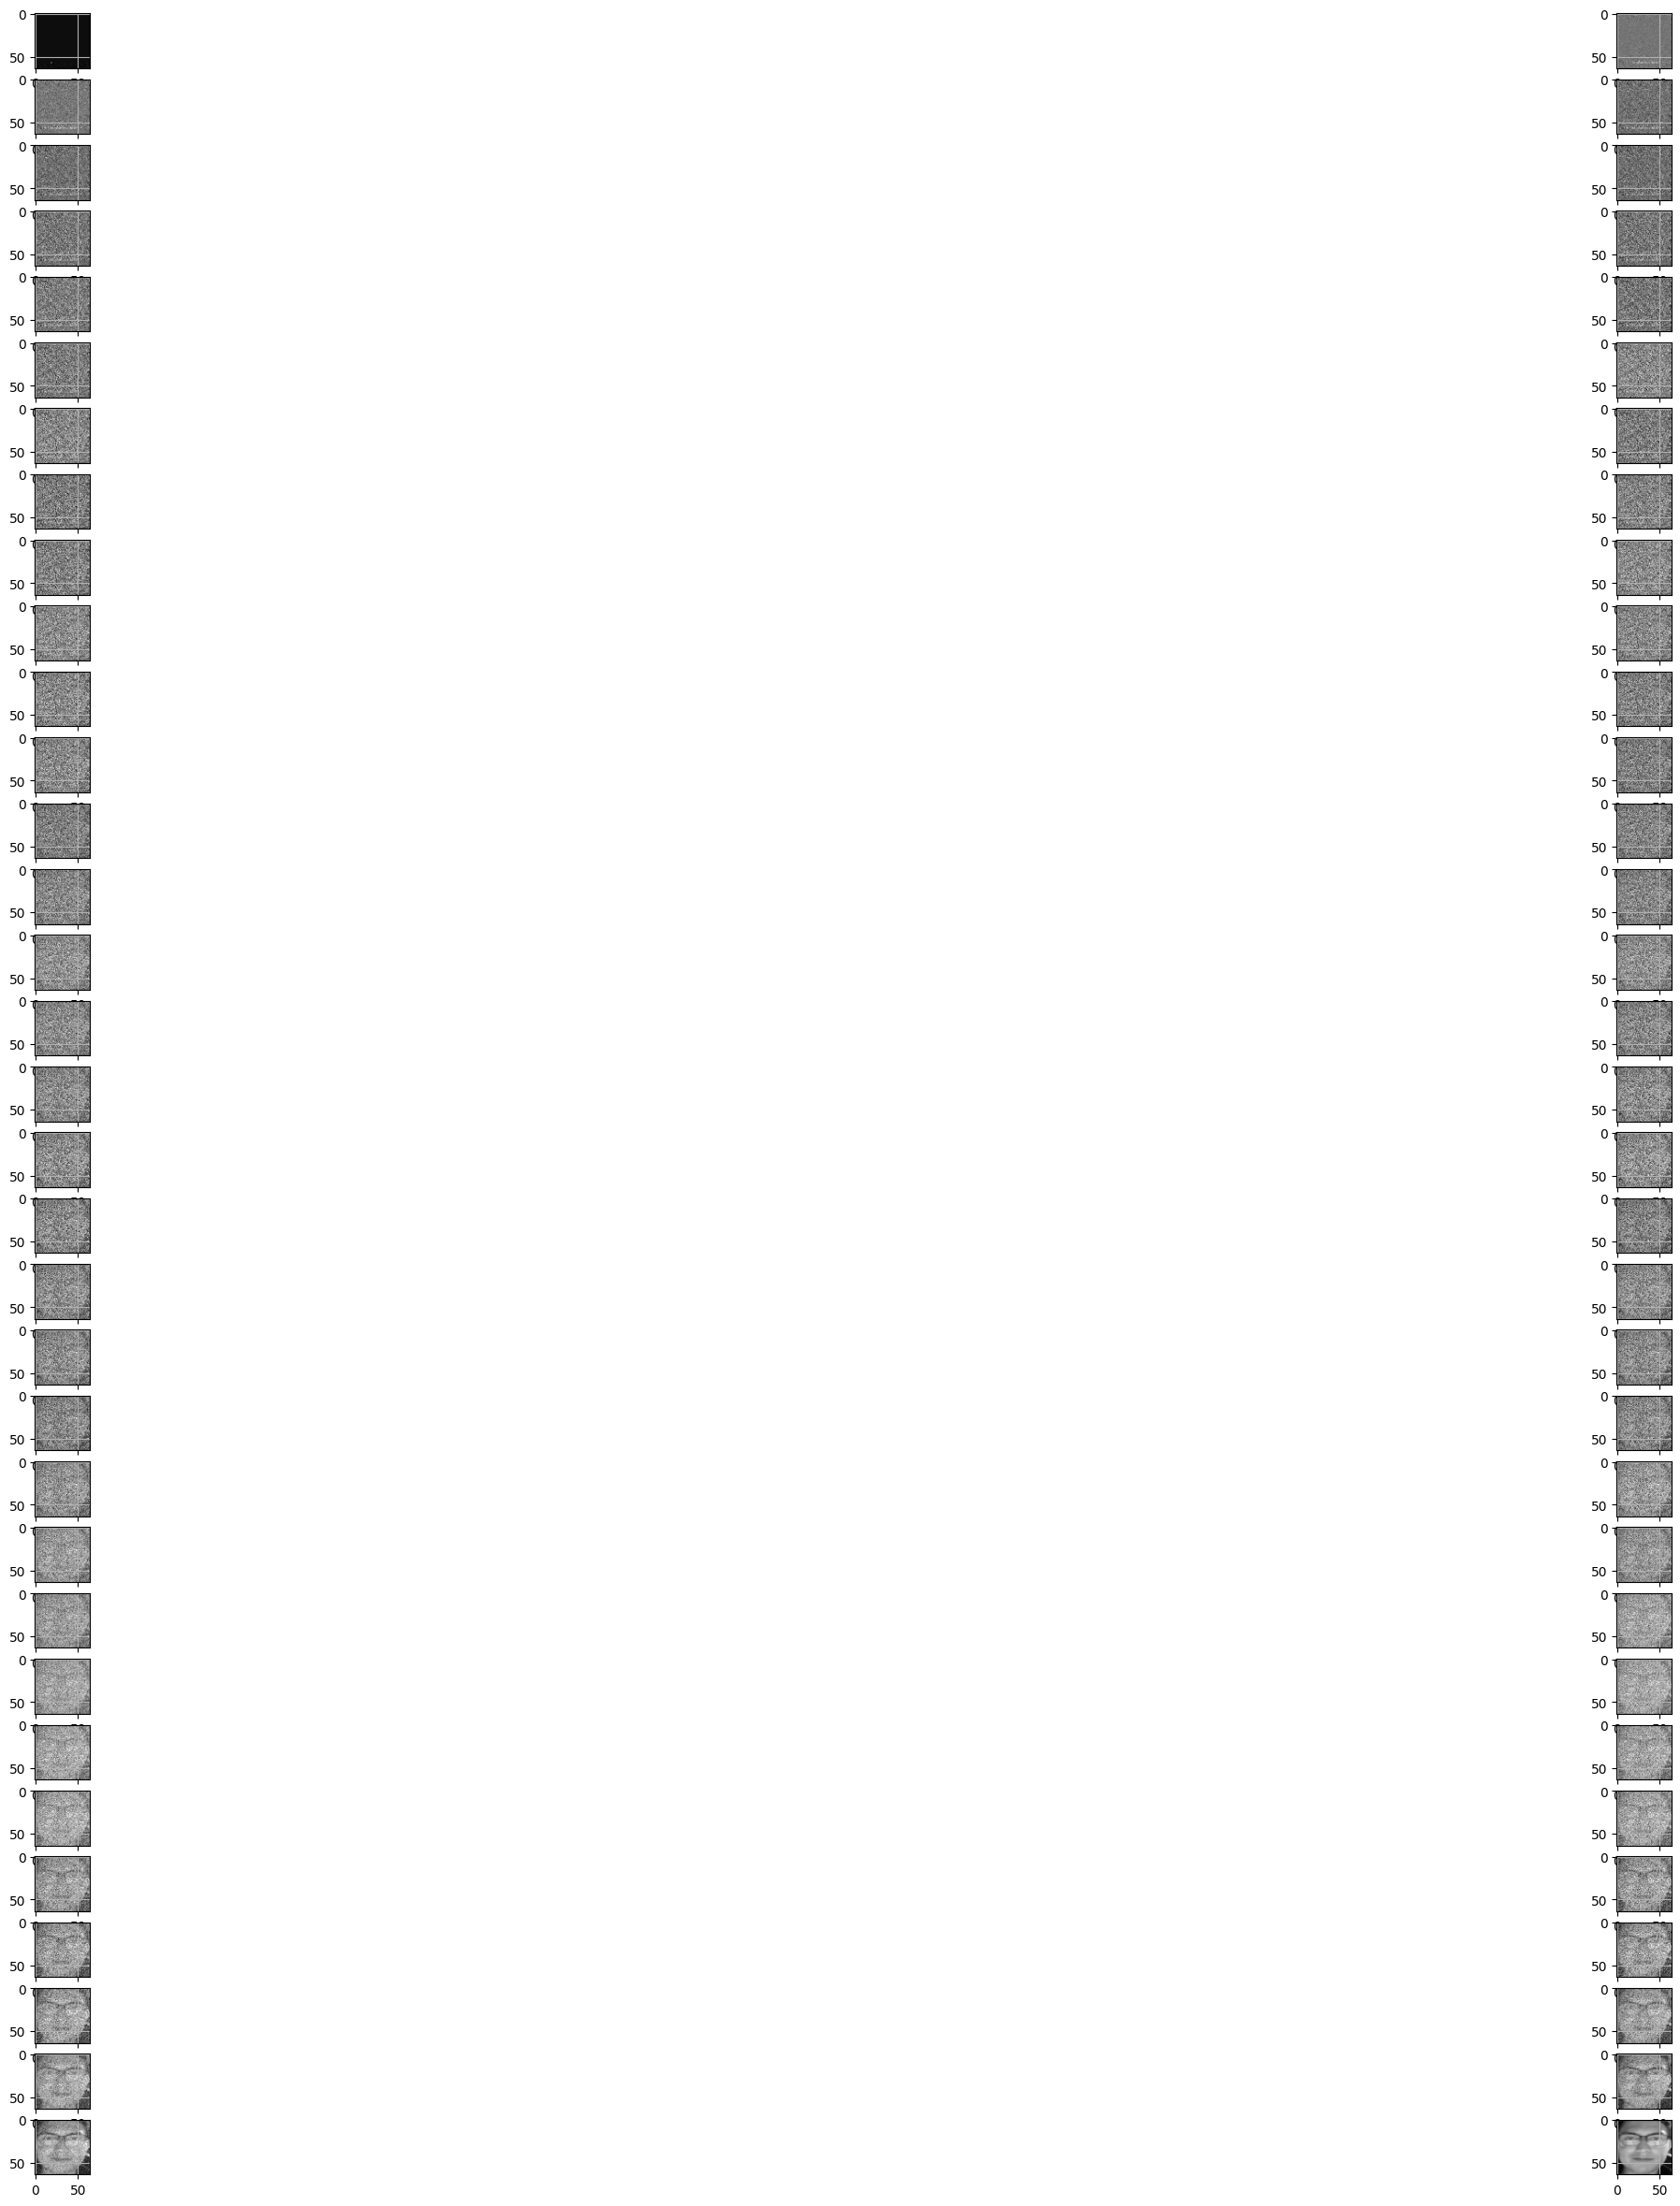

In [ ]:
#Ahora procedemos a ver como se va obteniendo mi cara a medida que hacemos una combinación lineal
face = np.zeros(4096)
faces = []
for i in range(0,4096):
  face = face + Face_coef[i]*np.array(v[i])
  face_reshape = np.reshape(face, (64,64))

  if (i % 63 == 0):
    faces.append(face_reshape)

show_images(faces, figsize=(40, 30))

### **Referencias**



*  [1] Eigenfaces — Face Classification in Python: https://towardsdatascience.com/eigenfaces-face-classification-in-python-7b8d2af3d3ea

*  [2] Github-Face Classification in Python: https://github.com/daradecic/Python-Eigenfaces/blob/master/EigenFaces.ipynb

*  [3] OpenCV Eigenfaces for Face Recognition: https://pyimagesearch.com/2021/05/10/opencv-eigenfaces-for-face-recognition/
*  [4] Ordenar valores propios y vectores propios en python https://stackoverflow.com/questions/8092920/sort-eigenvalues-and-associated-eigenvectors-after-using-numpy-linalg-eig-in-pyt
*  [5] Eigenvalues grandes: https://towardsdatascience.com/eigenvalues-and-eigenvectors-378e851bf372
*  [6] Importing Image Data into NumPy Arrays: https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays



In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


# Ruta de la carpeta que contiene las imágenes
ruta_carpeta = '/content/drive/Shareddrives/ProyectoALN/IMAGES_ALN'

Mounted at /content/drive


In [ ]:
# Lista los archivos en la carpeta
archivos = os.listdir(ruta_carpeta)
n = len(archivos)
size = np.array(Image.open(os.path.join(ruta_carpeta, archivos[0]))).shape
vectorsize = np.prod(np.array(size))

print("Tamaño de las imágenes: ",size)
print("Cantidad de imágenes: ",n)

Tamaño de las imágenes:  (1718, 2444, 3)
Cantidad de imágenes:  821


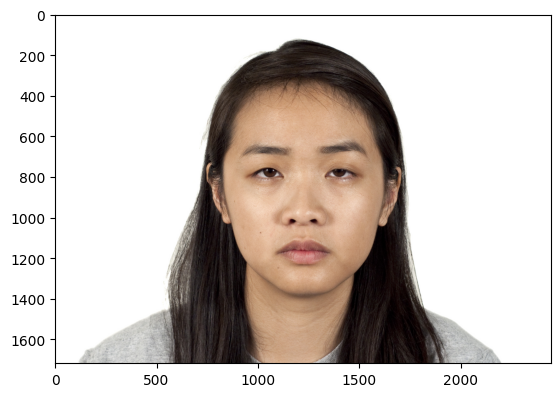

In [ ]:
Imagen0=np.array(Image.open(os.path.join(ruta_carpeta, archivos[0])))
plt.imshow(Imagen0)
plt.show()

In [ ]:
I= np.array(Image.open(os.path.join(ruta_carpeta, archivos[0]))).shape[0]
J= np.array(Image.open(os.path.join(ruta_carpeta, archivos[0]))).shape[1]
K= np.array(Image.open(os.path.join(ruta_carpeta, archivos[0]))).shape[2]


In [ ]:
np.zeros(I*J*K)

array([0., 0., 0., ..., 0., 0., 0.])